In [3]:
# CARGA DE DATASET Y LIBRERÍAS
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/Datos_abiertos_cepre.csv')
df.head(6)

,IDHASH,COLEGIO,COLEGIO_DEPA,COLEGIO_PROV,COLEGIO_DIST,COLEGIO_PAIS,COLEGIO_ANIO_EGRESO,ESPECIALIDAD,ANIO_POSTULA,CICLO_POSTULA,...,ANIO_NACIMIENTO,NACIMIENTO_PAIS,NACIMIENTO_DEPA,NACIMIENTO_PROV,NACIMIENTO_DIST,SEXO,CALIF_FINAL,INGRESO,MODO_INGRESO,FECHA_CORTE
0,54CB3EB25FC93C1FAC691E2351D8E561EA7A5C1CC0C840...,Corazón de Jesús,CALLAO,CALLAO,CALLAO,PERU,2013,SIN ESPECIALIDAD,2016,2,...,1997,Peru,CALLAO,CALLAO,CALLAO,MASCULINO,4.491,NO,SIN INGRESO,20240529
1,5A18BE74478BB8BAA3D1E1B0830AF43D883E55471BEC50...,Aurelio miro quesada sosa,LIMA,LIMA,LA MOLINA,PERU,2013,SIN ESPECIALIDAD,2016,2,...,1997,Peru,LIMA,LIMA,LIMA,FEMENINO,2.045,NO,SIN INGRESO,20240529
2,5BF8EBFFA46ED932AE6135BD683BB792AC8E4B9C068DAD...,Daniel Alomia Robles,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PERU,2015,SIN ESPECIALIDAD,2016,2,...,2000,Peru,LIMA,LIMA,INDEPENDENCIA,MASCULINO,0.642,NO,SIN INGRESO,20240529
3,3CCEB93417E4F004B107B6389797B7948BA7F051FCB405...,alfonso ugarte,LIMA,LIMA,LURIGANCHO,PERU,2015,SIN ESPECIALIDAD,2016,2,...,1999,Peru,LIMA,LIMA,SAN JUAN DE LURIGANCHO,FEMENINO,0.535,NO,SIN INGRESO,20240529
4,909D65D35B90A659D366B3F8B2C467594E550452ACBA6C...,pamer,LIMA,LIMA,PUENTE PIEDRA,PERU,2015,SIN ESPECIALIDAD,2016,2,...,1999,Peru,LIMA,LIMA,PUENTE PIEDRA,MASCULINO,0.591,NO,SIN INGRESO,20240529
5,3566BB55D095ABB6EA4F0FFE2B5754848ADE1FE3B4F69F...,2095,LIMA,LIMA,LOS OLIVOS,PERU,2014,SIN ESPECIALIDAD,2016,2,...,1997,Peru,LIMA,LIMA,LIMA,FEMENINO,0.369,NO,SIN INGRESO,20240529


In [4]:
# AGREGAR COLUMNA 'CICLO' PARA CONSIDERAR EL DATO EN UNA SOLA COLUMNA
df['CICLO'] = df[['ANIO_POSTULA', 'CICLO_POSTULA']].astype(str).agg('-'.join, axis=1)
df['CICLO']

,CICLO
0,2016-2
1,2016-2
2,2016-2
3,2016-2
4,2016-2
...,...
33804,2023-2
33805,2023-2
33806,2023-2
33807,2023-2


In [5]:
# AGREGAR COLUMNA 'EDAD' RESTANDO EL AÑO DE POSTULACIÓN Y AÑO DE NACIMIENTO
df['EDAD'] = df['ANIO_POSTULA'] - df['ANIO_NACIMIENTO']
df['EDAD']

,EDAD
0,19
1,19
2,16
3,17
4,17
...,...
33804,18
33805,18
33806,19
33807,17


In [6]:
# REASIGNAMOS EL NOMBRE DE LA COLUMNA 'IDHASH' POR EL DE 'ALUMNOS' Y VALIDAMOS LA INFORMACIÓN DEL DF CON LA ACTUALIZACIÓN HASTA EL MOMENTO
df.rename(columns={'IDHASH': 'ALUMNOS'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33809 entries, 0 to 33808
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALUMNOS              33809 non-null  object 
 1   COLEGIO              33809 non-null  object 
 2   COLEGIO_DEPA         33809 non-null  object 
 3   COLEGIO_PROV         33809 non-null  object 
 4   COLEGIO_DIST         33809 non-null  object 
 5   COLEGIO_PAIS         33809 non-null  object 
 6   COLEGIO_ANIO_EGRESO  33809 non-null  int64  
 7   ESPECIALIDAD         33809 non-null  object 
 8   ANIO_POSTULA         33809 non-null  int64  
 9   CICLO_POSTULA        33809 non-null  int64  
 10  DOMICILIO_DEPA       33809 non-null  object 
 11  DOMICILIO_PROV       33809 non-null  object 
 12  DOMICILIO_DIST       33809 non-null  object 
 13  ANIO_NACIMIENTO      33809 non-null  int64  
 14  NACIMIENTO_PAIS      33809 non-null  object 
 15  NACIMIENTO_DEPA      33809 non-null 

In [7]:
# CONTABILIZAR ALUMNOS MATRICULADOS POR EDAD
gdf = df.groupby('EDAD')[['ALUMNOS']].count()
gdf

,ALUMNOS
EDAD,
14,1
15,2
16,204
17,4864
18,9650
19,8490
20,4848
21,2576
22,1289


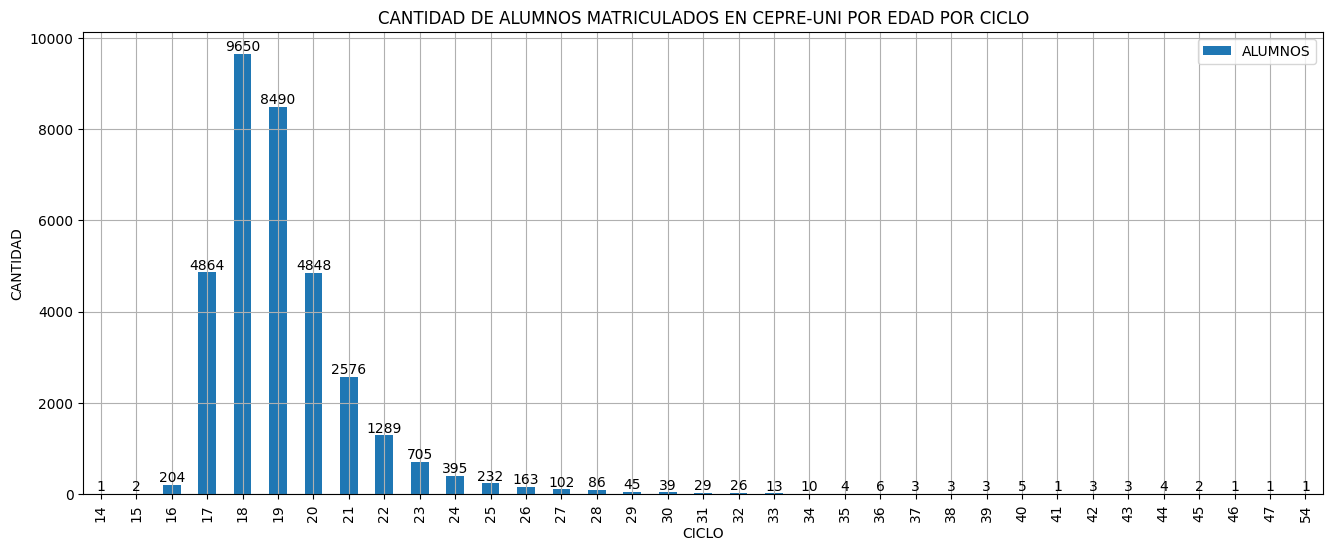

In [8]:
# GRAFICAMOS EL DF RESULTADO
ax_gdf=gdf.plot(kind='bar',figsize=(16,6),xlabel='CICLO',ylabel='CANTIDAD',title='CANTIDAD DE ALUMNOS MATRICULADOS EN CEPRE-UNI POR EDAD POR CICLO',grid=True)
for container in ax_gdf.containers:
    ax_gdf.bar_label(container)

In [9]:
# CONTABILIZAR ALUMNOS INGRESANTES POR EDAD POR CICLO
gdf2 = df[(df['INGRESO']=='SI') & (df['MODO_INGRESO']=='DIRECTO')].groupby('EDAD')[['ALUMNOS']].count()
gdf2

,ALUMNOS
EDAD,
16,11
17,256
18,826
19,1020
20,641
21,399
22,190
23,99
24,53


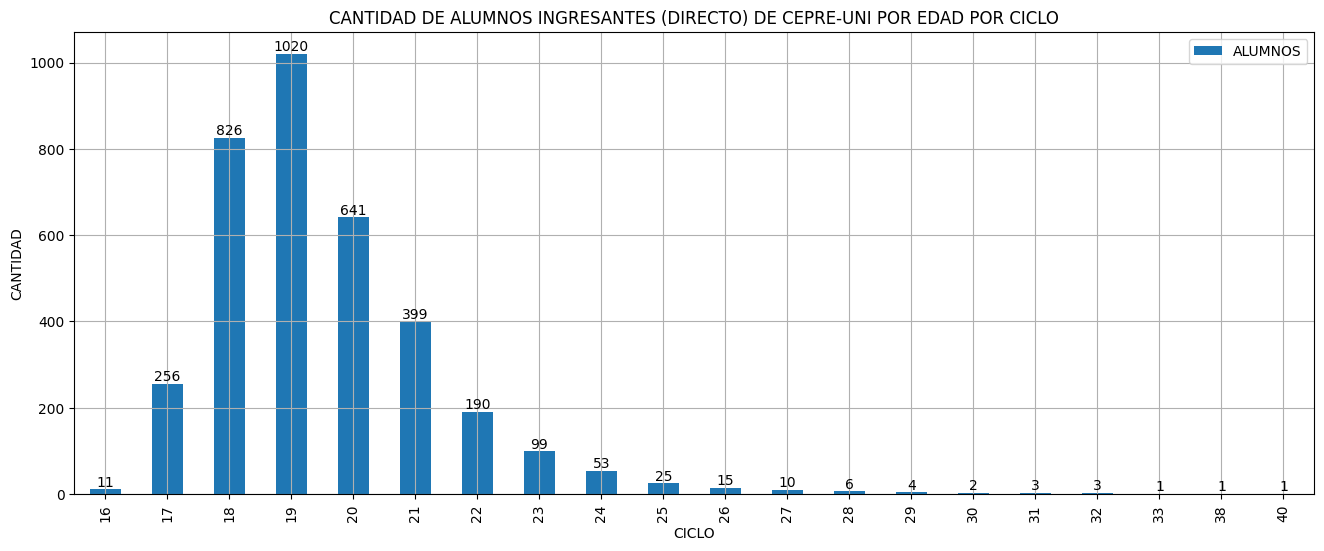

In [10]:
# GRAFICAMOS EL DF RESULTADO
ax_gdf2=gdf2.plot(kind='bar',figsize=(16,6),xlabel='CICLO',ylabel='CANTIDAD',title='CANTIDAD DE ALUMNOS INGRESANTES (DIRECTO) DE CEPRE-UNI POR EDAD POR CICLO',grid=True)
for container in ax_gdf2.containers:
    ax_gdf2.bar_label(container)

In [11]:
# DETERMINAR LA EDAD MIN Y MAX DE ALUMNOS INGRESANTES POR CICLO
gdf3 = df[(df['INGRESO'] == 'SI') & (df['MODO_INGRESO'] == 'DIRECTO')].groupby('CICLO').agg(
    EDAD_MINIMA=('EDAD', 'min'),
    EDAD_MAXIMA=('EDAD', 'max')
)
gdf3

,EDAD_MINIMA,EDAD_MAXIMA
CICLO,,
2016-2,16,32
2017-1,16,30
2017-2,17,29
2018-1,17,25
2018-2,16,26
2019-1,16,33
2019-2,17,25
2020-1,17,28
2021-1,17,27


In [12]:
# DETERMINAR LA NOTA MIN Y MAX DE ALUMNOS INGRESANTES POR CICLO
gdf4 = df[(df['INGRESO'] == 'SI') & (df['MODO_INGRESO'] == 'DIRECTO')].groupby('CICLO').agg(
    NOTA_MINIMA=('CALIF_FINAL', 'min'),
    NOTA_MAXIMA=('CALIF_FINAL', 'max')
)
gdf4

,NOTA_MINIMA,NOTA_MAXIMA
CICLO,,
2016-2,11.044,17.855
2017-1,11.223,17.252
2017-2,11.060,17.602
2018-1,11.004,17.209
2018-2,11.092,18.039
2019-1,12.304,18.459
2019-2,11.096,17.665
2020-1,11.926,17.648
2021-1,11.046,16.702
